In [178]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression as lg
from sklearn.ensemble import RandomForestClassifier as rdc
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Importing the Dataset 


In [179]:
df = pd.read_csv('transaction_dataset.csv')
df.head(10)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
5,5,6,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,9900.12,375.48,20926.68,2,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
6,6,7,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,69.46,629.44,8660.35,25,11,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7,7,8,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,7.0,None,XENON
8,8,9,0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4,0,0.00,0.00,496.62,1,1,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9,9,10,0x0012f247c9f980eea0a9ad06893bfd95c3145794,0,2570.59,3336.01,30572.70,8,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,None,AICRYPTO


In [180]:
df = df.replace(['NO DATA','NaN',''],np.nan)

In [181]:
df.tail()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9836,9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Free BOB Tokens - BobsRepair.com
9839,9839,2178,0xffde23396d57e10abf58bd929bb1e856c7718218,1,0.00,0.00,0.00,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,9840,2179,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,1,37242.70,149.56,670817.33,18,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,,INS Promo1


## Understanding the Dataset

In [182]:
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [183]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


### Checking missing value percentage in dataframe

In [184]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

 ERC20_most_rec_token_type                              8.647495
 ERC20 most sent token type                             8.545879
 ERC20 min val rec                                      8.423941
 ERC20 total ether sent                                 8.423941
 ERC20 total Ether sent contract                        8.423941
 ERC20 uniq sent addr                                   8.423941
 ERC20 uniq rec addr                                    8.423941
 ERC20 uniq sent addr.1                                 8.423941
 ERC20 uniq rec contract addr                           8.423941
 ERC20 avg time between sent tnx                        8.423941
 ERC20 avg time between rec tnx                         8.423941
 ERC20 avg time between rec 2 tnx                       8.423941
 ERC20 avg time between contract tnx                    8.423941
 ERC20 max val rec                                      8.423941
 Total ERC20 tnxs                                       8.423941
 ERC20 avg val rec       

Text(0, 0.5, 'Number of rows')

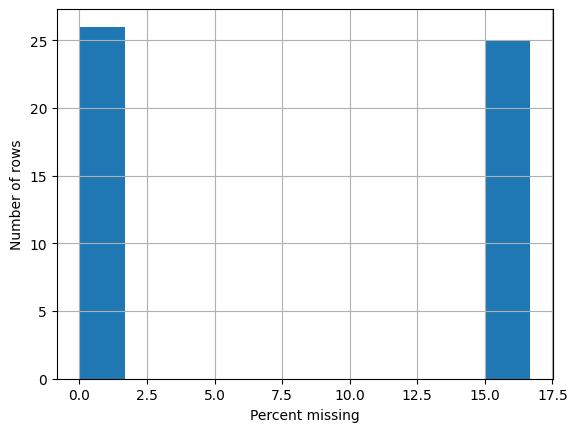

In [185]:
percent_missing_rows = df.isnull().sum(axis=0) / len(df.columns)
missing_plt = percent_missing_rows.hist()
missing_plt.set_xlabel('Percent missing')
missing_plt.set_ylabel('Number of rows')

# Cleaning Dataset

In [186]:
dfCopy = df.copy()

In [187]:
dfCopy = dfCopy.replace(['NO DATA', 'N/A', '', 'NaN'],np.nan)

In [188]:
dfCopy.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [189]:
dfCopy = dfCopy.drop(['Index', 'Address'], axis = 1)
dfCopy.head()

,Unnamed: 0,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


#### Checking the number of different strings in last 2 columns

In [190]:
dfCopy.iloc[:, 47:49].head(15)

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
5,0,0
6,0,0
7,None,XENON
8,0,0
9,None,AICRYPTO


#### Replace the 0 and None values by np.nan

In [191]:
dfCopy.iloc[:, 47:49] = dfCopy.iloc[:, 47:49].replace(['NO DATA', 'N/A', " ", 'NaN', 0, '0', 'None'],np.nan)

In [192]:
dfCopy.iloc[:, 47:49].tail(5)

,ERC20 most sent token type,ERC20_most_rec_token_type
9836,NaN,GSENetwork
9837,NaN,Blockwell say NOTSAFU
9838,NaN,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN
9840,NaN,INS Promo1


In [193]:
noOfUniqueTokenSent = dfCopy.iloc[:, 47].value_counts(dropna=True)
noOfUniqueTokenSent

EOS                                                       138
OmiseGO                                                   137
Golem                                                     130
blockwell.ai KYC Casper Token                             128
StatusNetwork                                              61
                                                         ... 
RCoinVer70                                                  1
Covalent Token                                              1
Nebula AI Token                                             1
Blocktix                                                    1
eosDAC Community Owned EOS Block Producer ERC20 Tokens      1
Name:  ERC20 most sent token type, Length: 302, dtype: int64

In [194]:
noOfUniqueTokenRec = dfCopy.iloc[:, 48].value_counts(dropna=True)
noOfUniqueTokenRec

OmiseGO                  873
Blockwell say NOTSAFU    779
DATAcoin                 358
Livepeer Token           207
EOS                      161
                        ... 
BCDN                       1
Egretia                    1
UG Coin                    1
Yun Planet                 1
INS Promo1                 1
Name:  ERC20_most_rec_token_type, Length: 464, dtype: int64

In [195]:
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

In [196]:
dfCopy.tail(5)

,Unnamed: 0,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9836,9836,1,12635.10,631.39,58748.48,4,13,0,11,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,GSENetwork
9837,9837,1,0.00,0.00,0.00,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,Blockwell say NOTSAFU
9838,9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,Free BOB Tokens - BobsRepair.com
9839,9839,1,0.00,0.00,0.00,0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9840,9840,1,37242.70,149.56,670817.33,18,3,0,1,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,NaN,INS Promo1


In [197]:
imputer = imputer.fit(dfCopy.iloc[:, 2:47])

In [198]:
dfCopy.iloc[:, 2:47] = imputer.transform(dfCopy.iloc[:, 2:47])

C:\Users\NIMESH\AppData\Local\Temp\ipykernel_1972\1018841656.py:1: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [199]:
dfCopy.iloc[:, 2:47].tail(5)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
9836,12635.10,631.39,58748.48,4.0,13.0,0.0,11.0,4.0,0.004082,12.00,...,1.337000e+00,6.685000e-01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
9837,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.00,...,1.337000e+01,1.337000e+01,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
9838,2499.44,2189.29,261601.88,67.0,43.0,0.0,31.0,44.0,0.001078,21.31,...,1.500000e+03,3.006939e+02,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,5.000000
9839,0.00,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.500000,0.50,...,1.252524e+08,4.346203e+06,11741.257297,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
9840,37242.70,149.56,670817.33,18.0,3.0,0.0,1.0,5.0,0.795233,18998.00,...,2.018061e+04,1.365244e+03,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,42.000000


## Standardizing the data

In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()

In [202]:
scaler.fit(dfCopy.iloc[:, 2:47])

StandardScaler()

In [203]:
dfCopy.iloc[:, 2:47] = scaler.transform(dfCopy.iloc[:, 2:47])

In [204]:
dfCopy.iloc[:, 2:47].tail()

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
9836,0.351318,-0.319467,-0.494191,-0.147826,-0.160186,-0.02637,-0.064838,-0.082788,-0.134518,-0.039295,...,-1.242182e-02,-2.121228e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.21489,-1.771125e-01
9837,-0.236759,-0.346822,-0.676119,-0.153108,-0.174004,-0.02637,-0.101676,-0.097951,-0.134530,-0.040217,...,-1.242182e-02,-2.121222e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.21489,-2.397701e-01
9838,-0.120427,-0.251968,0.133991,-0.064623,-0.128298,-0.02637,0.002140,0.068838,-0.134527,-0.038579,...,-1.242167e-02,-2.121082e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.21489,1.086008e-02
9839,-0.236759,-0.346822,-0.676119,-0.153108,-0.172941,-0.02637,-0.098327,-0.097951,-0.132996,-0.040179,...,1.477813e-18,4.545457e-18,-1.804268e-18,-1.649742e-18,1.645492e-18,0.0,0.0,0.0,0.00000,5.565108e-17
9840,1.496632,-0.340343,1.401220,-0.129336,-0.170815,-0.02637,-0.098327,-0.078998,-0.132090,1.420251,...,-1.241982e-02,-2.120562e-02,-1.164623e-02,-1.154591e-02,-1.116354e-02,0.0,0.0,0.0,-0.21489,2.329189e+00


In [205]:
X = dfCopy.iloc[:, 2:46]
y = dfCopy.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Visualizing the standardized data

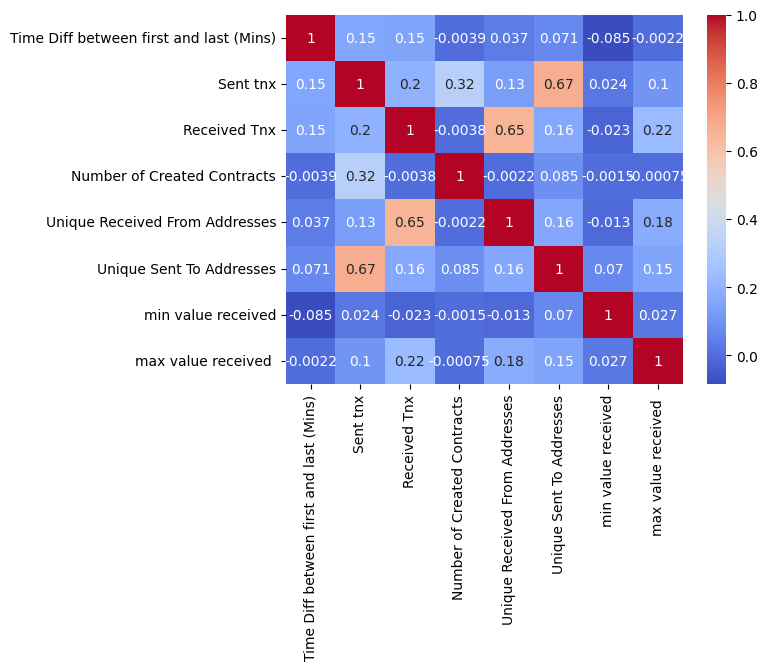

In [206]:
correlation_matrix = X.iloc[:, 2:10].corr()
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt='.2g',cmap= 'coolwarm')

# Training the Model

In [209]:
# #Adaptive Boosting 
adc = AdaBoostClassifier(n_estimators=50, base_estimator= None,learning_rate=1, random_state = 1)
adc = adc.fit(X_train,y_train)


#Random Forest Classifier 
clf = rdc(n_estimators = 500)
clf = clf.fit(X_train,y_train)

#Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc = dtc.fit(X_train,y_train)

#For Logistic Regression 
lr = lg(random_state=0,  max_iter=1000).fit(X_train, y_train)



In [210]:
#comparing accuracy's of Models

#Adaptive Boosting
adc_pred = adc.predict(X_test)
print("Adaptive Boosting accuracy:",metrics.accuracy_score(y_test,adc_pred))

#Random Forest
clf_pred = clf.predict(X_test)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test,clf_pred))

#Decision Tree Classifier
dtc_pred=dtc.predict(X_test)
print("Decision Tree Classifier:",metrics.accuracy_score(y_test, dtc_pred))

#Logistic Regression
lr_pred = lr.predict(X_test)
print("Logistic Regression:",metrics.accuracy_score(y_test,lr_pred))

Adaptive Boosting accuracy: 0.9769725702675246
Random Forest Accuracy: 0.979004402302743
Decision Tree Classifier: 0.9661361327463597
Logistic Regression: 0.8469353200135455


In [211]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Visualize the importance of each feature 

In [212]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

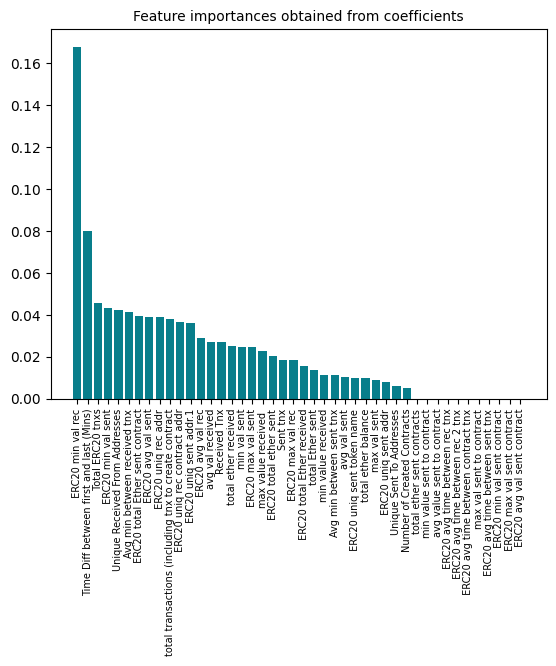

In [213]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.xticks(fontsize = 7)
plt.show()

# Evaluating the Random Forest model

In [214]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]) 

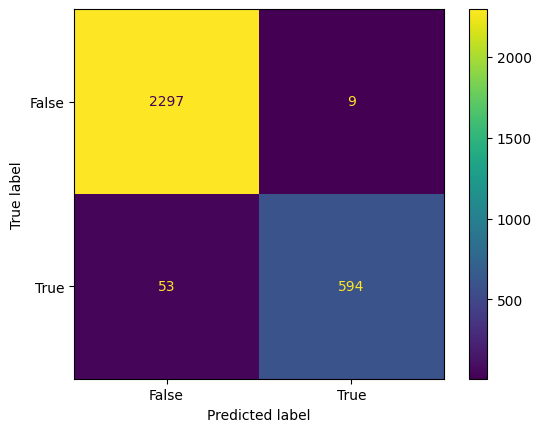

In [215]:
cm_display.plot()

In [216]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred)
recall_score = metrics.recall_score(y_test, y_pred)
print("Accuracy of Decision Tree: ", accuracy_score)
print("Precision of Decision Tree: ", precision_score)
print("Recall of Decision Tree: ", recall_score)

Accuracy of Decision Tree:  0.979004402302743
Precision of Decision Tree:  0.9850746268656716
Recall of Decision Tree:  0.9180834621329211


### Ploting ROC curve and measuring the AUC

In [217]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [218]:
#Saving the probabilites of outcome in different variables for each classifier

rf_prob = clf.predict_proba(X_test)
rf_prob = rf_prob[:, 1]
adb_prob = adc.predict_proba(X_test)
adb_prob = adb_prob[:, 1]
dtc_prob = dtc.predict_proba(X_test)
dtc_prob = dtc_prob[:, 1]
lr_prob = lr.predict_proba(X_test)
lr_prob = lr_prob[:, 1]

In [219]:
#Calculating the AUC score

rf_auc = roc_auc_score(y_test, rf_prob)
adb_auc = roc_auc_score(y_test, adb_prob)
dtc_auc = roc_auc_score(y_test, dtc_prob)
lr_auc = roc_auc_score(y_test, lr_prob)

In [220]:
#Printing the AUC Scores

print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Adaptive Boosting: AUROC = %.3f' % (adb_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random Forest: AUROC = 0.998
Adaptive Boosting: AUROC = 0.997
Decision Tree: AUROC = 0.953
Logistic Regression: AUROC = 0.883


In [221]:
#Calculating the False Postive Rate (FPR) and True Positive Rate (TPR) of the classifiers

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
adb_fpr, adb_tpr, _ = roc_curve(y_test, adb_prob)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)

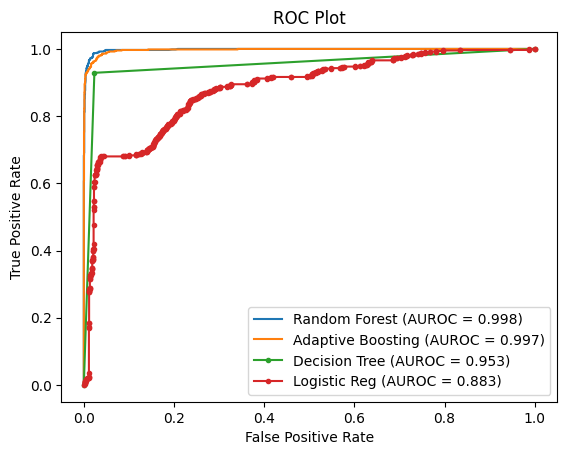

In [222]:
#Ploting the Reciever Operating Characteristic (ROC) curve

plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(adb_fpr, adb_tpr, label='Adaptive Boosting (AUROC = %0.3f)' % adb_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Reg (AUROC = %0.3f)' % lr_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

# Saving the model into a joblib file

In [223]:
# from joblib import dump, load
# X_Address = dfCopy.iloc[:,2:46]
# X_Address
# X_Address['Address'] = df.iloc[:,2:3]
# X_Address
# # temp = X_Address.where(X_Address['Address'] == "0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e")
# # X_info = temp.dropna().iloc[:,0:44]
# # X_info
# dump(X_Address, "X_Address.joblib")
# # dump(clf, "Ethereum_Fraud_Detection.joblib")
# # loader = load("Ethereum_Fraud_Detection.joblib")

In [224]:
# X_Address = load('X_Address.joblib')
# X_Address

In [225]:
# temp = X_Address.where(X_Address['Address'] == "0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e")
# print(type(temp))
# X_info = temp.dropna().iloc[:,0:44]
# X_info 
# # print(type(X_info))

In [226]:
# import pickle
# with open('X_Address_pickle', 'wb') as f:
#     pickle.dump(X_Address, f)

# with open('X_Address_pickle', 'rb') as f:
#     X_info =pickle.load(f)